In [2]:
import numpy as np
import os
#from scipy import ndimage
#from scipy.spatial import distance
#from sklearn.cluster import KMeans
import cv2 as cv2
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans
from scipy.spatial.distance import cosine
from tqdm import tqdm
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans



def image_loader(dir_path):
  images_list = []
  for imagename in os.listdir(dir_path):
    img_path = dir_path+'/'+imagename
    #if img is not None:
    images_list.append(img_path)
  return images_list

def SIFT(images_list):

  descriptors_list = []
  keypoints_list = []
  for image_paths in images_list:
    #reading image commented cuz its already being read
    img1 = cv2.imread(image_paths)
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

    #keypoints
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)

    keypoints_list.append(keypoints_1)
    descriptors_list.append(descriptors_1)

    #print(type(keypoints_1))
    #img_1 = cv2.drawKeypoints(gray1,keypoints_1,img1,[0,255,0])
    #plt.imshow(img_1)
    #view raw

  return keypoints_list, descriptors_list

In [4]:
dir_path = 'C:/Users/vegesna/Documents/Opencv/HW2/task_5/database'
images_list = image_loader(dir_path)
keypoints_list, descriptors_list = SIFT(images_list)
descriptors_array = np.vstack(tuple(descriptors_list))

In [6]:
print(descriptors_array.shape)
print(len(descriptors_list))

(14232391, 128)
15000


In [7]:
np.save("C:/Users/vegesna/Documents/Opencv/HW2/descriptors_array", descriptors_array)


In [12]:
import pickle
with open('descriptors_list.pkl', 'wb') as f:
    pickle.dump(descriptors_list, f)

OSError: [Errno 28] No space left on device

In [ ]:
with open('descriptors_list.pkl', 'rb') as f:
    descriptors_list_loaded = pickle.load(f)

In [9]:
data=np.load("descriptors_array.npy")
print(data.shape)

(14232391, 128)


In [13]:
# define the k means model minibatch, default batch size - 1024
model = MiniBatchKMeans(n_clusters=100)

# compute clusters
model.fit(descriptors_array)


AttributeError: 'MiniBatchKMeans' object has no attribute 'clustercenters'

In [15]:
visual_words = model.cluster_centers_
print(visual_words.shape)
# function to generate histograms using the extracted features and k means clusters


(100, 128)


In [18]:
print(type(descriptors_list))

<class 'list'>


In [16]:
def build_histogram(descriptors_list, model):
    histogram = np.zeros(len(model.cluster_centers_))
    cluster_result = model.predict(descriptors_list)
    for i in cluster_result:
        histogram[i] += 1.0
    return histogram
# create numpy arrays to store the histograms of 300 visual words


In [34]:
histogram_data = np.zeros((len(os.listdir(dir_path)), 100))
#Histogram Calculation for individual images
idx =0
for i in descriptors_list:
  histogram_data[idx] = build_histogram(i,model)
  idx+=1
#Histogram for everything
histogram_total_data = build_histogram(descriptors_array,model)

In [29]:
print(histogram_data[2500])
print(len(histogram_data))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
15000


In [32]:
dir_path_query = 'C:/Users/vegesna/Documents/Opencv/HW2/task_5/query'
images_list_query = image_loader(dir_path_query)
keypoints_list_query, descriptors_list_query = SIFT(images_list_query)
descriptors_array_query = np.vstack(tuple(descriptors_list_query))


histogram_data_query = np.zeros((len(os.listdir(dir_path_query)), 100))
#Histogram Calculation for individual images
idx =0
for i in descriptors_list_query:
  histogram_data_query[idx] = build_histogram(i,model)
  idx+=1
#Histogram for everything
histogram_total_data_query = build_histogram(descriptors_array_query,model)


In [33]:
print(histogram_data_query.shape)

(3, 100)


In [35]:
histogram_data_combined = build_histogram(descriptors_array, model)

In [42]:
knn = NearestNeighbors(n_neighbors=1)
knn.fit(histogram_data)

distance, nearest_index = knn.kneighbors(histogram_data_query)

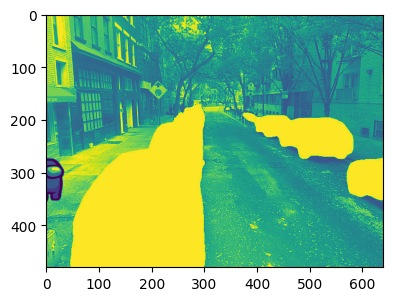

In [43]:
fig = plt.figure(figsize=(20, 18))
n = 1

# show all images corresponding to each query
for idx, img_path in enumerate(os.listdir("task_5/database")):
    if idx in nearest_index[0]:
        fig.add_subplot(4, 4, n)
        n += 1
        # read curent image
        curr_img_path = os.getcwd() + "/" + "task_5/database" + "/" + img_path
        curr_img = cv2.imread(curr_img_path, cv2.IMREAD_GRAYSCALE)
        plt.imshow(curr_img)

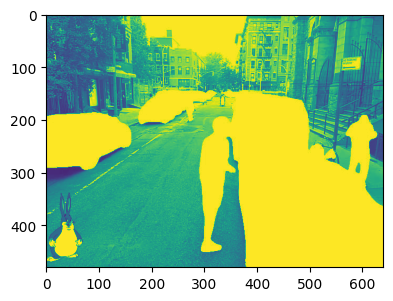

In [44]:
fig = plt.figure(figsize=(20, 18))
n = 1

# show all images corresponding to each query
for idx, img_path in enumerate(os.listdir("task_5/database")):
    if idx in nearest_index[1]:
        fig.add_subplot(4, 4, n)
        n += 1
        # read curent image
        curr_img_path = os.getcwd() + "/" + "task_5/database" + "/" + img_path
        curr_img = cv2.imread(curr_img_path, cv2.IMREAD_GRAYSCALE)
        plt.imshow(curr_img)

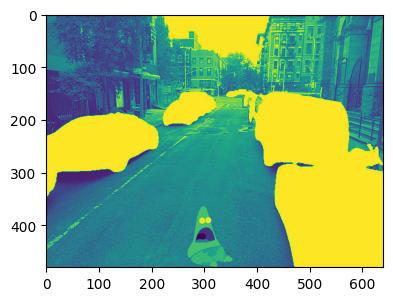

In [45]:
fig = plt.figure(figsize=(20, 18))
n = 1

# show all images corresponding to each query
for idx, img_path in enumerate(os.listdir("task_5/database")):
    if idx in nearest_index[2]:
        fig.add_subplot(4, 4, n)
        n += 1
        # read curent image
        curr_img_path = os.getcwd() + "/" + "task_5/database" + "/" + img_path
        curr_img = cv2.imread(curr_img_path, cv2.IMREAD_GRAYSCALE)
        plt.imshow(curr_img)